In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset
data = pd.read_csv('finance1.csv', encoding='latin-1')

In [3]:
data.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,28 Oct 2020,Approved,African Development Fund,Finance,Sovereign
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,13 Oct 2020,Implementation,Fragile States Facility,Finance,Sovereign
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,15 May 2020,Implementation,Fragile States Facility,Finance,Sovereign
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,27 Apr 2020,Implementation,Middle Income Countries Fund,Finance,Sovereign
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,15 Apr 2020,Approved,African Development Bank,Finance,Non Sovereign


# Cleaning Data

In [4]:
data.shape

(355, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         337 non-null    object
 1   Title                336 non-null    object
 2   Commitment in U.A    336 non-null    object
 3   Country              336 non-null    object
 4   Starting Date        336 non-null    object
 5   Status               336 non-null    object
 6   Source of Financing  336 non-null    object
 7   Sector               336 non-null    object
 8   Sovereign            281 non-null    object
dtypes: object(9)
memory usage: 25.1+ KB


Found NaN

In [6]:
data.duplicated().sum()

17

In [7]:
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         280 non-null    object
 1   Title                280 non-null    object
 2   Commitment in U.A    280 non-null    object
 3   Country              280 non-null    object
 4   Starting Date        280 non-null    object
 5   Status               280 non-null    object
 6   Source of Financing  280 non-null    object
 7   Sector               280 non-null    object
 8   Sovereign            280 non-null    object
dtypes: object(9)
memory usage: 21.9+ KB


In [9]:
data.duplicated().sum()

0

In [10]:
data['Starting Date'] = pd.to_datetime(data['Starting Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Project Code         280 non-null    object        
 1   Title                280 non-null    object        
 2   Commitment in U.A    280 non-null    object        
 3   Country              280 non-null    object        
 4   Starting Date        280 non-null    datetime64[ns]
 5   Status               280 non-null    object        
 6   Source of Financing  280 non-null    object        
 7   Sector               280 non-null    object        
 8   Sovereign            280 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 21.9+ KB


In [12]:
data['year'] = data['Starting Date'].dt.year

In [13]:
data.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,year
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,2020-10-28,Approved,African Development Fund,Finance,Sovereign,2020
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,2020-10-13,Implementation,Fragile States Facility,Finance,Sovereign,2020
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,2020-05-15,Implementation,Fragile States Facility,Finance,Sovereign,2020
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,2020-04-27,Implementation,Middle Income Countries Fund,Finance,Sovereign,2020
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,2020-04-15,Approved,African Development Bank,Finance,Non Sovereign,2020


In [14]:
data = data[data.year == 2019]

Target year 2019 only because year 2020 not complete

In [15]:
data.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,year
10,P-ML-HZ0-001,Mali - African Trade Insurance Agency (ATI): C...,"7,290,000.00",Mali,2019-12-05,Approved,African Development Fund,Finance,Sovereign,2019
11,P-KE-HAB-030,Kenya - Equity Group Holdings Plc,"73,173,765.74",Kenya,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019
12,P-MA-HAA-012,"Morocco - ""Fonds dEquipement Communal (FEC)""","79,781,717.22",Morocco,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019
13,P-Z1-HB0-064,Multinational  Project for Digitisation of Go...,"1,258,000.00",Multinational,2019-11-25,Implementation,Fragile States Facility,Finance,Sovereign,2019
14,P-Z1-HB0-071,SIERRA LEONE - Government Payments Digitizatio...,"279,000.00",Multinational,2019-11-25,Approved,Fragile States Facility,Finance,Sovereign,2019


In [16]:
data = data.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sector', 'Sovereign'], axis=1)

Delete unimportant columns

***

In [17]:
data.head()

,Commitment in U.A,Country,year
10,"7,290,000.00",Mali,2019
11,"73,173,765.74",Kenya,2019
12,"79,781,717.22",Morocco,2019
13,"1,258,000.00",Multinational,2019
14,"279,000.00",Multinational,2019


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 10 to 36
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Commitment in U.A  26 non-null     object
 1   Country            26 non-null     object
 2   year               26 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 728.0+ bytes


In [19]:
data['Commitment in U.A'] = data['Commitment in U.A'].str.replace(r',', '')

In [20]:
data.head()

,Commitment in U.A,Country,year
10,7290000.00,Mali,2019
11,73173765.74,Kenya,2019
12,79781717.22,Morocco,2019
13,1258000.00,Multinational,2019
14,279000.00,Multinational,2019


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 10 to 36
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Commitment in U.A  26 non-null     object
 1   Country            26 non-null     object
 2   year               26 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 728.0+ bytes


In [22]:
data['Commitment in U.A'] = data['Commitment in U.A'].astype(float)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 10 to 36
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Commitment in U.A  26 non-null     float64
 1   Country            26 non-null     object 
 2   year               26 non-null     int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 728.0+ bytes


In [24]:
data = data.reset_index()

In [25]:
data.head()

,index,Commitment in U.A,Country,year
0,10,7290000.00,Mali,2019
1,11,73173765.74,Kenya,2019
2,12,79781717.22,Morocco,2019
3,13,1258000.00,Multinational,2019
4,14,279000.00,Multinational,2019


In [26]:
data = data.drop(['index'], axis=1)

In [27]:
data.head(10)

,Commitment in U.A,Country,year
0,7290000.00,Mali,2019
1,73173765.74,Kenya,2019
2,79781717.22,Morocco,2019
3,1258000.00,Multinational,2019
4,279000.00,Multinational,2019
5,463000.00,Multinational,2019
6,783328.00,Multinational,2019
7,5853901.26,Guinea,2019
8,11967257.58,Senegal,2019
9,5666565.14,Kenya,2019


In [28]:
df = data.groupby('Country')['Commitment in U.A'].sum().reset_index()
df

,Country,Commitment in U.A
0,Botswana,5.799833e+07
1,Guinea,5.853901e+06
2,Kenya,1.543019e+08
3,Madagascar,1.500000e+06
4,Mali,7.290000e+06
5,Morocco,7.978172e+07
6,Mozambique,2.195213e+07
7,Multinational,3.077863e+08
8,Nigeria,1.071764e+07
9,Rwanda,1.024433e+07


<Figure size 1000x800 with 0 Axes>

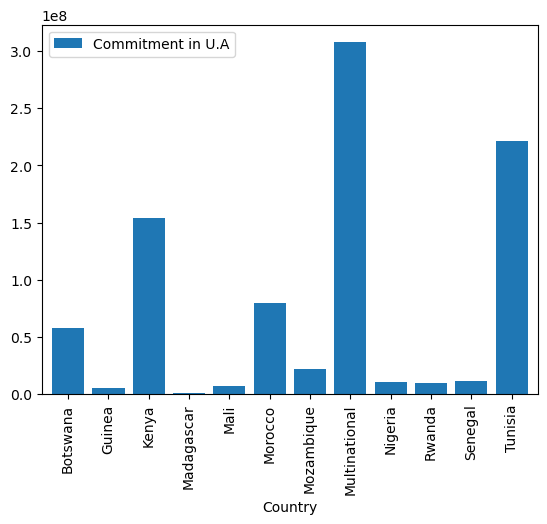

In [29]:
plt.figure(figsize=(10,8))
df.plot(x='Country', y='Commitment in U.A', kind='bar', width=0.8);

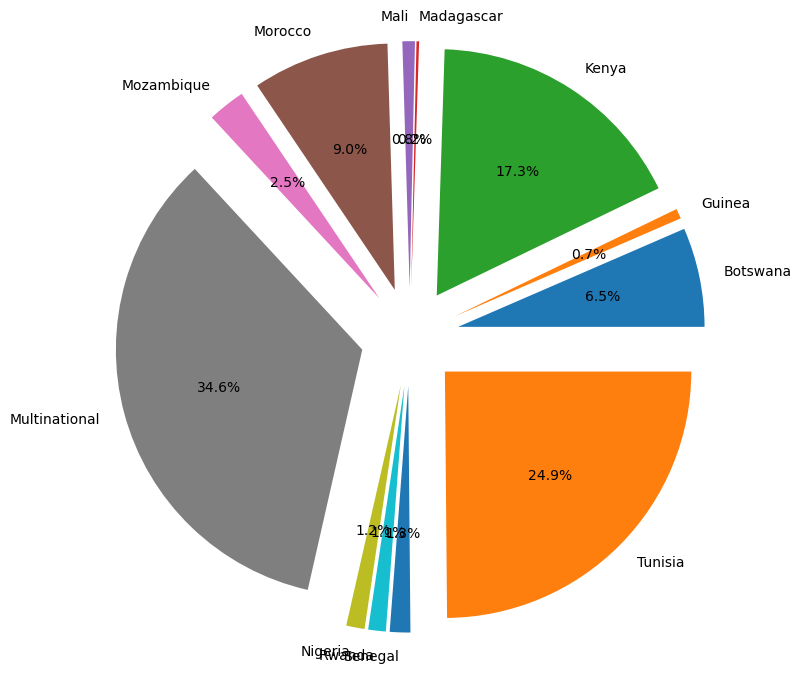

In [35]:
plt.figure(figsize=(10,8))
plt.pie(x=df['Commitment in U.A'], labels=df.Country, autopct='%1.1f%%', explode=[0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]);

We conclude that the top 3 countries in financing are:

* Multinational: 34.6%
* Tunisia: 24.9%
* Kenya: 17.3%